# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    R - Identify any null or missing data, and impute appropriate replacement values.
    R - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    R - View summary statistics for the numeric fields in the dataset.
    R - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        R - *What are the average (mean) departure and arrival delays?*
        R - *How do the carriers compare in terms of arrival delay performance?*
        R - *Is there a noticable difference in arrival delays for different days of the week?*
        R - *Which departure airport has the highest average departure delay?*
        * - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        * - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        R - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.


In [ ]:
# Your code to explore the data

Limpieza de datos

In [5]:
# Imputación de valores nulos
# Eliminación de outliers en DepDelay y ArrDelay 
## calculo de cuartiles
Q1 = df_flights['DepDelay'].quantile(0.25)
Q3 = df_flights['DepDelay'].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
df_clean = df_flights[~((df_flights['DepDelay'] < (Q1 - 1.5 * IQR)) | (df_flights['DepDelay'] > (Q3 + 1.5 * IQR)))]

# Obtener estadísticas descriptivas
print(df_clean.describe())


           Year          Month     DayofMonth      DayOfWeek  OriginAirportID  \
count  237882.0  237882.000000  237882.000000  237882.000000    237882.000000   
mean     2013.0       7.013889      15.798942       3.903376     12753.070686   
std         0.0       2.001336       8.846643       1.995922      1506.076046   
min      2013.0       4.000000       1.000000       1.000000     10140.000000   
25%      2013.0       5.000000       8.000000       2.000000     11292.000000   
50%      2013.0       7.000000      16.000000       4.000000     12892.000000   
75%      2013.0       9.000000      23.000000       6.000000     14100.000000   
max      2013.0      10.000000      31.000000       7.000000     15376.000000   

       DestAirportID     CRSDepTime       DepDelay      DepDel15  \
count  237882.000000  237882.000000  237882.000000  235121.00000   
mean    12736.224700    1294.950194       0.455289       0.08545   
std      1503.855339     469.764599       8.120036       0.27955  

### Distribución de DepDelay y ArrDelay:
#### visualizacion de datos limpios

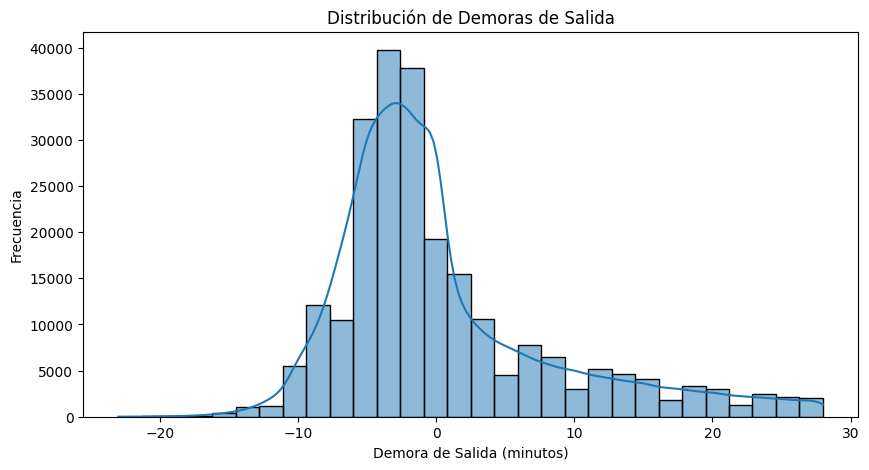

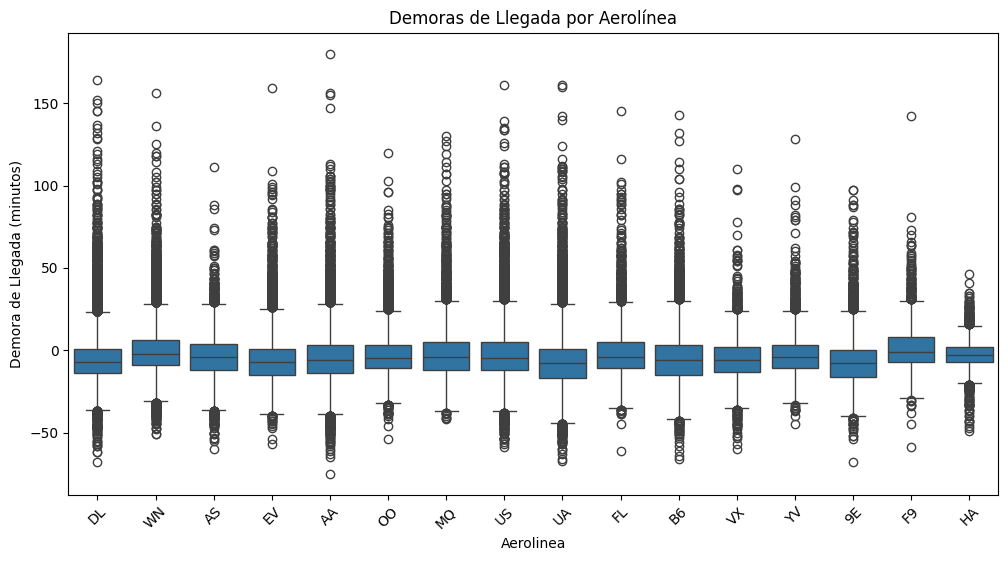

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de DepDelay
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['DepDelay'], bins=30, kde=True)
plt.title('Distribución de Demoras de Salida')
plt.xlabel('Demora de Salida (minutos)')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de ArrDelay por Carrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='Carrier', y='ArrDelay', data=df_clean)
plt.title('Demoras de Llegada por Aerolínea')
plt.xlabel('Aerolinea')
plt.ylabel('Demora de Llegada (minutos)')
plt.xticks(rotation=45)
plt.show()


### Preguntas de Análisis:



In [6]:
#  ¿Cuáles son los retrasos medios (promedio) de salida y llegada?
mean_dep_delay = df_clean['DepDelay'].mean()
mean_arr_delay = df_clean['ArrDelay'].mean()
print(f"Promedio de Demora de Salida: {mean_dep_delay:.2f} minutos")
print(f"Promedio de Demora de Llegada: {mean_arr_delay:.2f} minutos")


Promedio de Demora de Salida: 0.46 minutos
Promedio de Demora de Llegada: -3.51 minutos


In [7]:
# ¿Cómo se comparan los transportistas en términos de desempeño de retraso de llegada?
carrier_delay = df_clean.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)
print(carrier_delay)


Carrier
F9    1.273759
WN   -0.531055
FL   -1.914791
MQ   -1.943378
US   -2.528131
HA   -2.557629
YV   -2.611739
OO   -3.024571
AS   -3.813286
B6   -4.357232
AA   -4.502842
VX   -4.728987
EV   -5.236572
DL   -5.374729
9E   -6.552613
UA   -6.621198
Name: ArrDelay, dtype: float64


In [8]:
# ¿Hay diferencia en los retrasos de llegada según los días de la semana?
dayofweek_delay = df_clean.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()
print(dayofweek_delay)


DayOfWeek
6   -5.242928
2   -4.399798
7   -4.146274
1   -3.377853
3   -3.048067
5   -2.728993
4   -1.925573
Name: ArrDelay, dtype: float64


In [9]:
# ¿Cuál aeropuerto de salida tiene el mayor promedio de retraso de salida?
airport_delay = df_clean.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
print(airport_delay.head(1))


OriginAirportName
Chicago Midway International    5.084211
Name: DepDelay, dtype: float64


In [10]:
# ¿Las salidas tardías tienden a resultar en mayores retrasos de llegada que las salidas a tiempo?
late_dep = df_clean[df_clean['DepDelay'] > 0]['ArrDelay'].mean()
ontime_dep = df_clean[df_clean['DepDelay'] <= 0]['ArrDelay'].mean()
print(f"Promedio de Demora para vuelos con salida tardía: {late_dep:.2f} minutos")
print(f"Promedio de Demora para vuelos a tiempo: {ontime_dep:.2f} minutos")


Promedio de Demora para vuelos con salida tardía: 5.43 minutos
Promedio de Demora para vuelos a tiempo: -7.85 minutos


In [13]:
# ¿Qué ruta tiene la mayor cantidad de llegadas tardías?
df_clean['Route'] = df_clean['OriginAirportName'] + " -> " + df_clean['DestAirportName']
late_arrivals = df_clean[df_clean['ArrDel15'] == 1].groupby('Route').size().sort_values(ascending=False)
print(late_arrivals.head(1))


Route
San Francisco International -> Los Angeles International    128
dtype: int64


C:\Users\Zbook\AppData\Local\Temp\ipykernel_17832\477580688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Route'] = df_clean['OriginAirportName'] + " -> " + df_clean['DestAirportName']


In [14]:
#  ¿Qué ruta tiene el mayor promedio de retraso de llegada?
route_delay = df_clean.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)
print(route_delay.head(1))


Route
Louis Armstrong New Orleans International -> Ronald Reagan Washington National    25.333333
Name: ArrDelay, dtype: float64
